# Dados de Logística - Analisando performance e SLA de transportadoras 

## Introdução
Neste notebook procurei realizar uma análise exploratória de um conjunto de dados logísticos fictícios, focando em medir o desempenho de SLA (Service Level Agreement) e OTD (On-Time Delivery). As métricas e visualizações foram desenvolvidas para apresentar padrões e insights úteis para a gestão de transporte e logística aos leads interessados.

---

## Importando as Libs do notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Configuração inicial das visualizações dos dados

In [2]:
sns.set(style='whitegrid')


## Carregando os Dados

In [3]:
df = pd.read_csv('csv/dados_logisticos_5000.csv', sep=";")

In [4]:

# Validando se os dados foram carregados corretamente

validate = df.head()

print(validate)

   ID da Entrega Transportadora Data de Pedido Data Prevista de Entrega  \
0              1    FastExpress     2024-01-21               2024-01-24   
1              2     CargaCerta     2024-01-21               2024-01-28   
2              3    FastExpress     2024-01-30               2024-02-01   
3              4    FastExpress     2024-01-24               2024-01-29   
4              5    FastExpress     2024-01-07               2024-01-11   

  Data de Entrega        Status Cidade de Origem Cidade de Destino  \
0      2024-01-27      Atrasado     Porto Alegre    Belo Horizonte   
1             NaN   Em trânsito         Brasília          Salvador   
2             NaN  Não Entregue         Salvador    Rio de Janeiro   
3      2024-01-29      Entregue         Brasília    Rio de Janeiro   
4             NaN  Não Entregue        São Paulo          Brasília   

   Distância (km)  Peso da Carga (kg)  
0            1624               16.13  
1             215               11.84  
2       

## Limpeza e Transformação dos Dados
As colunas de datas são convertidas para o formato datetime, e colunas adicionais são criadas para facilitar a análise:

- **Dias de Atraso**: Diferença entre a data de entrega real e a data prevista.
- **Cumpriu SLA**: Indicador binário (1 para entrega dentro do prazo, 0 caso contrário).

In [5]:
# Converter colunas de datas para datetime
df["Data de Pedido"] = pd.to_datetime(df["Data de Pedido"])
df["Data Prevista de Entrega"] = pd.to_datetime(df["Data Prevista de Entrega"])
df["Data de Entrega"] = pd.to_datetime(df["Data de Entrega"], errors='coerce')

# Criar coluna "Dias de Atraso"
df["Dias de Atraso"] = (df["Data de Entrega"] - df["Data Prevista de Entrega"]).dt.days

# Criar coluna "Cumpriu SLA"
df["Cumpriu SLA"] = df["Dias de Atraso"].apply(lambda x: 1 if pd.notnull(x) and x <= 0 else 0)

In [6]:
# Validando as colunas
print(df.head())

   ID da Entrega Transportadora Data de Pedido Data Prevista de Entrega  \
0              1    FastExpress     2024-01-21               2024-01-24   
1              2     CargaCerta     2024-01-21               2024-01-28   
2              3    FastExpress     2024-01-30               2024-02-01   
3              4    FastExpress     2024-01-24               2024-01-29   
4              5    FastExpress     2024-01-07               2024-01-11   

  Data de Entrega        Status Cidade de Origem Cidade de Destino  \
0      2024-01-27      Atrasado     Porto Alegre    Belo Horizonte   
1             NaT   Em trânsito         Brasília          Salvador   
2             NaT  Não Entregue         Salvador    Rio de Janeiro   
3      2024-01-29      Entregue         Brasília    Rio de Janeiro   
4             NaT  Não Entregue        São Paulo          Brasília   

   Distância (km)  Peso da Carga (kg)  Dias de Atraso  Cumpriu SLA  
0            1624               16.13             3.0      

## Métricas Gerais

- Percentual geral de SLA cumprido.
- Contagem de status de entrega.
- Percentual de SLA por transportadora.

In [7]:
# Percentual de SLA
sla_percentual = df['Cumpriu SLA'].mean() * 100
status_cont = df['Status'].value_counts()
sla_transp = df.groupby('Transportadora')['Cumpriu SLA'].mean() * 100

In [8]:
print(sla_percentual)

24.54


In [9]:
print(status_cont)

Status
Não Entregue    1281
Atrasado        1263
Em trânsito     1229
Entregue        1227
Name: count, dtype: int64


In [10]:
print(sla_transp)

Transportadora
CargaCerta        23.058104
FastExpress       26.150262
TransLogística    24.332524
Name: Cumpriu SLA, dtype: float64


---

## Análise das métricas com Dashboards

### 1. Percentual de SLA por Transportadora
- Gráfico de Barras:

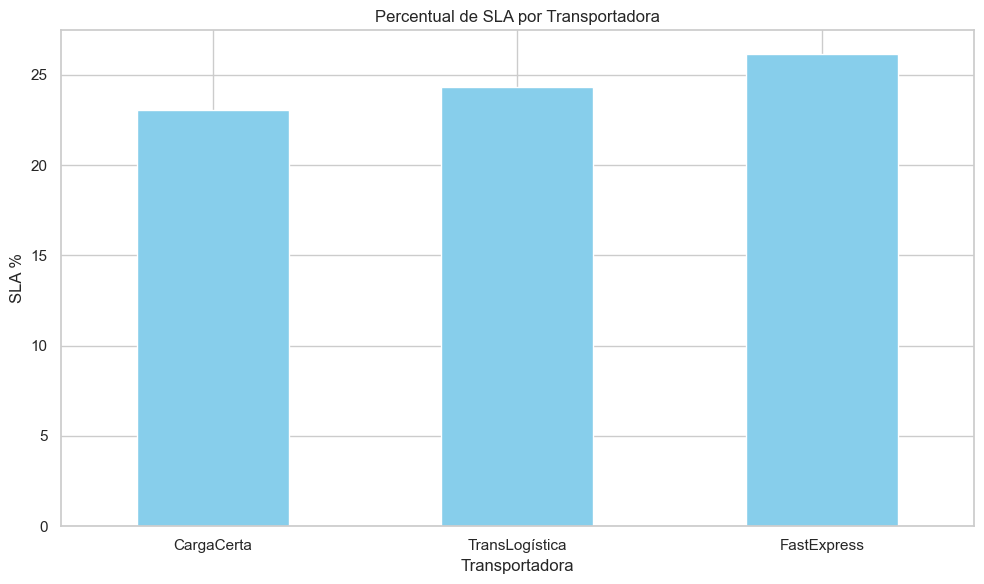

In [11]:
plt.figure(figsize=(10, 6))
sla_transp.sort_values().plot(kind='bar', color='skyblue')
plt.title('Percentual de SLA por Transportadora')
plt.ylabel('SLA %')
plt.xlabel('Transportadora')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 2. Contagem de Status de Entrega
- Gráfico de Barras

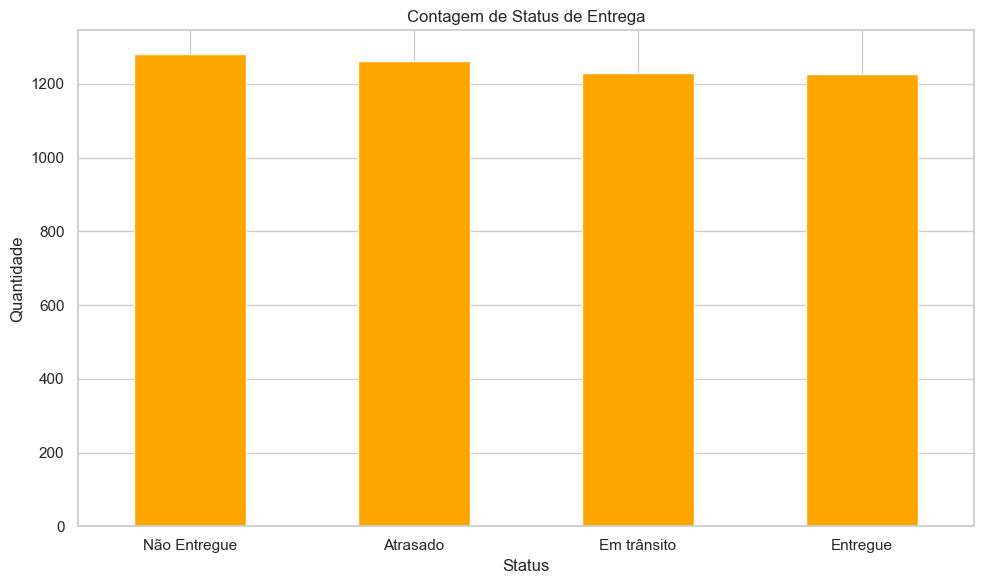

In [12]:
plt.figure(figsize=(10, 6))
status_cont.plot(kind='bar', color='orange')
plt.title('Contagem de Status de Entrega')
plt.ylabel('Quantidade')
plt.xlabel('Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 3. Atraso de Entrega x Distância em KM
- Gráfico de Dispersão:

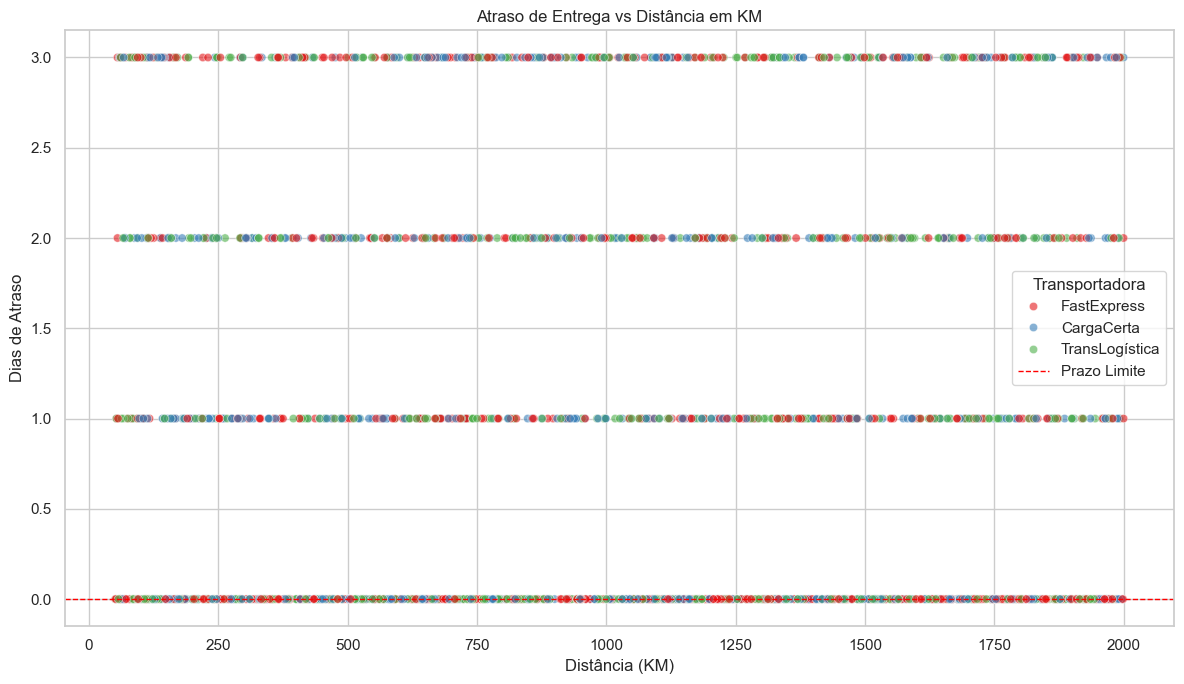

In [20]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df, 
    x='Distância (km)', 
    y='Dias de Atraso', 
    hue='Transportadora',
    palette='Set1',
    alpha=0.6
    )
plt.axhline(
    0, 
    color='red',
    linestyle='--',
    linewidth=1,
    label='Prazo Limite'
    )
plt.title('Atraso de Entrega vs Distância em KM')
plt.ylabel('Dias de Atraso')
plt.xlabel('Distância (KM)')
plt.legend(title='Transportadora')
plt.tight_layout()
plt.show()

### 4. Peso de Carga x Dias de Atraso
- Gráfico de Dispersão

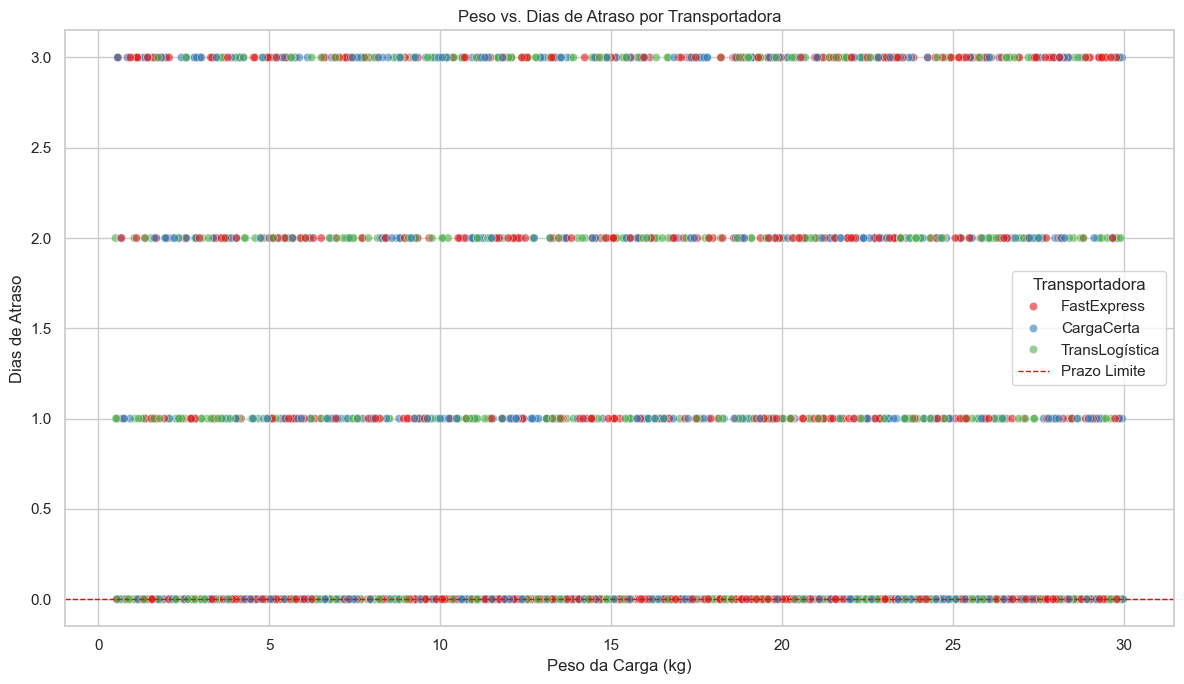

In [21]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df, 
    x="Peso da Carga (kg)", 
    y="Dias de Atraso", 
    hue="Transportadora",
    palette="Set1",
    alpha=0.6
)
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Prazo Limite')
plt.title("Peso vs. Dias de Atraso por Transportadora")
plt.ylabel("Dias de Atraso")
plt.xlabel("Peso da Carga (kg)")
plt.legend(title="Transportadora")
plt.tight_layout()
plt.show()